In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = data.drop(['class'], axis=1)
y = data['class']
X_encoded = pd.get_dummies(X, prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.30, random_state=101)

In [4]:
import time
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [5]:
start = time.process_time()

model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)

print(time.process_time() - start)

preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

1.796875
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

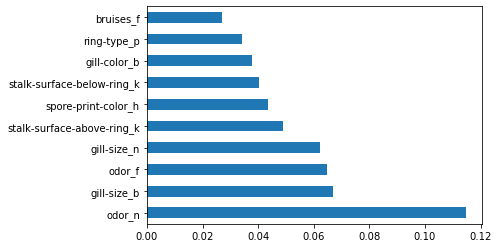

In [7]:
#figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feature_imp = pd.Series(model.feature_importances_, index= X_encoded.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [8]:
best_feat = feature_imp.nlargest(4).index.to_list()

X_reduced = X_encoded[feature_imp.nlargest(4).index]
Xr_scaled = StandardScaler().fit_transform(X_reduced)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y, test_size = 0.30, 
                                                        random_state = 101)

start = time.process_time()
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train,yr_train)
print(time.process_time() - start)

rpred = rmodel.predict(Xr_test)
print(confusion_matrix(yr_test, rpred))
print(classification_report(yr_test, rpred))

0.84375
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           e       0.96      0.98      0.97      1274
           p       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438

